<a href="https://colab.research.google.com/github/Ristoll/AIS_Labs/blob/main/LR_10_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: 6.49


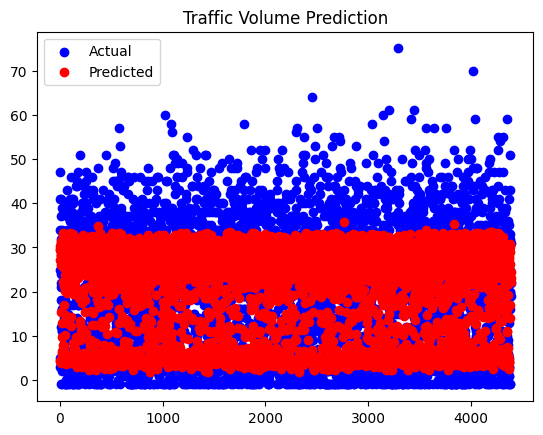

Predicted traffic for test datapoint: 25


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

# Завантаження даних
input_file = 'traffic_data.txt'
data = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        items = line.strip().split(',')
        data.append(items)

data = np.array(data)
label_encoder = []
X_encoded = np.empty(data.shape, dtype=float)

for i, item in enumerate(data[0]):
    if item.replace('.', '', 1).isdigit():
        X_encoded[:, i] = data[:, i].astype(float)
    else:
        le = LabelEncoder()
        X_encoded[:, i] = le.fit_transform(data[:, i])
        label_encoder.append(le)

X = X_encoded[:, :-1]
y = X_encoded[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Створення регресора ExtraTrees
regressor = ExtraTreesRegressor(n_estimators=100, max_depth=6, random_state=0)
regressor.fit(X_train, y_train)

# Оцінка на тестовому наборі
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", round(mae, 2))

plt.figure()
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.legend()
plt.title('Traffic Volume Prediction')
plt.show()

# Прогноз для одиночної точки
test_datapoint = ['Saturday', '10:20', 'Atlanta', 'no']  # заміни на свій приклад
test_datapoint_encoded = [-1] * len(test_datapoint)
count = 0

for i, item in enumerate(test_datapoint):
    if item.replace('.', '', 1).isdigit():
        test_datapoint_encoded[i] = float(item)
    else:
        test_datapoint_encoded[i] = int(label_encoder[count].transform([item])[0])
        count += 1

test_datapoint_encoded = np.array(test_datapoint_encoded).reshape(1, -1)

predicted_traffic = regressor.predict(test_datapoint_encoded)[0]
print("Predicted traffic for test datapoint:", int(predicted_traffic))

In [2]:
from google.colab import files

uploaded = files.upload()

Saving traffic_data.txt to traffic_data.txt
